<center> <h1> Assignment 3 </h1> </center>

### 1. . Explain normal equation method to estimate the parameters of multiple linear regression. Write a function for it.

Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. We can use the normal equation to directly compute the parameters of a model that minimizes the Sum of the squared difference between the actual term and the predicted term.  
<center>θ=(X<sup>T</sup>X)<sup> −1</sup>X <sup>T</sup>y</center>
Where:<br>
θ is the vector of parameters (coefficients).<br>
X is the matrix of input features, where each row represents a sample and each column represents a feature. The first column is usually all ones (for the intercept term).<br>
y is the vector of target values.<br>

In [1]:
import numpy as np

def multiple_linear_regression_normal_eq(X, y):
    X = np.c_[np.ones(X.shape[0]), X] #adding column of 1s at start
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta
#Example
X=2*np.random.randn(100,1)
y=4+3*X+np.random.randn(100,1)                
theta=multiple_linear_regression_normal_eq(X, y)
print(theta)

[[4.00564637]
 [2.97635149]]


### 2. A college professor believes that if the grade for internal examination is high in a class, the grade for external examination will also be high. A random sample of 10 students are selected, and the data is as follows:
Marks_internal examination (X)= [ 15, 23, 18, 23, 24, 22, 22, 19, 19, 16]<br>
Marks_external examination (Y) = [49, 63, 58, 60, 58, 61, 60, 63, 60, 52] <br>
Find the polynomial regression model of degree 3 and linear regression model from the above data

Linear Regression model:
Intercept:  37.463442069741276
Coefficient:  1.0416197975253096

Polynomial Regression model of degree 3:
Intercept:  -103.81796009580953
Coefficients:  [ 1.57135372e+01 -3.66067751e-01 -2.86182579e-04]


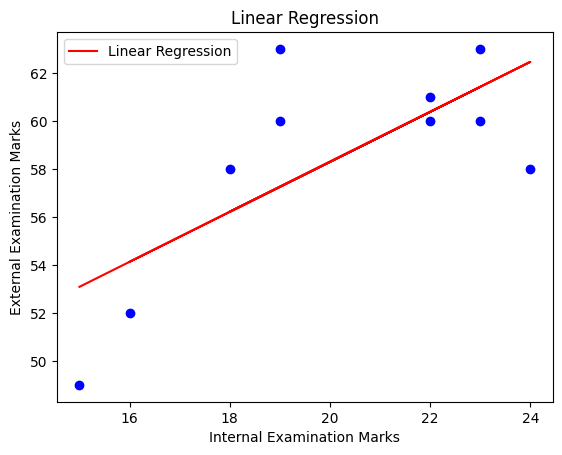

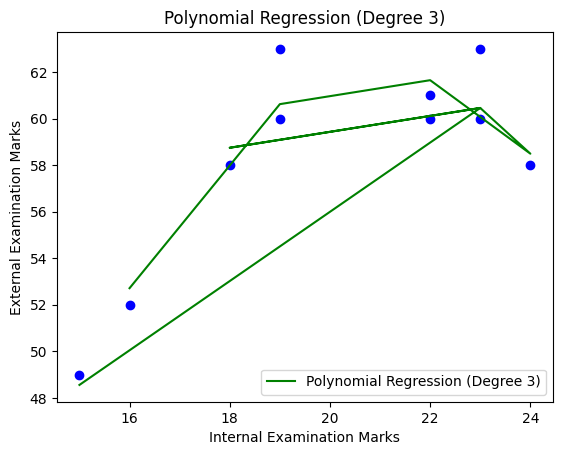

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# Data
X = np.array([15, 23, 18, 23, 24, 22, 22, 19, 19, 16]).reshape(-1, 1)
Y = np.array([49, 63, 58, 60, 58, 61, 60, 63, 60, 52])

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, Y)
print("Linear Regression model:")
print("Intercept: ", linear_model.intercept_)
print("Coefficient: ", linear_model.coef_[0])

# Polynomial Regression of degree 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)
print("\nPolynomial Regression model of degree 3:")
print("Intercept: ", poly_model.intercept_)
print("Coefficients: ", poly_model.coef_[1:4])

plt.scatter(X, Y, color='blue')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Internal Examination Marks')
plt.ylabel('External Examination Marks')
plt.legend()
plt.show()

# Plotting the polynomial regression results
plt.scatter(X, Y, color='blue')
plt.plot(X, poly_model.predict(X_poly), color='green', label='Polynomial Regression (Degree 3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Internal Examination Marks')
plt.ylabel('External Examination Marks')
plt.legend()
plt.show()


### 3. Explain Gradient Descent method in context of linear regression.

Gradient Descent is an iterative optimization algorithm that tries to find the optimum value (Minimum/Maximum) of an objective function.
Gradient Descent is an optimization algorithm commonly used in machine learning to minimize the cost function of a model. In the context of linear regression, Gradient Descent is employed to find the optimal parameters (coefficients) of the linear regression model that best fit the training data.


### 4. List and explain the issues of Linear Regression model. 

1. Outliers can have huge effects on the regression and boundaries are linear in this technique. <br>
2. Diversely, linear regression assumes a linear relationship between dependent and independent variables. That means it assumes that there is a straight-line relationship between them. It assumes independence between attributes. <br>
3. Linear regression also looks at a relationship between the mean of the dependent variables and the independent variables. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among variables. <br>
4. Limited Applicability: Linear regression may not be suitable for all types of data and problems. It may not perform well in situations where the relationship between the variables is highly non-linear, or where there are complex interactions among the variables.

### 5. Write the difference between gradient descent and normal equation method for regression coefficients estimation.

### Gradient Descent: 
1. In gradient descent, we need to choose the learning rate, Number of iterations, and another hyperparameter.
2. It is an iterative algorithm.
3. Gradient descent works well with large number of features.
4. Feature scaling can be used.
5. No need to handle non-invertibility cases. <br> <br>

### Normal Equation Method
1. In the normal equation, there is no need to choose the learning rate.
2. It is an analytical approach.
3. Normal equation works well with small number of features.
4. No need for feature scaling.
5. If (X<sup>T</sup>  X) is non-invertible, regularization can be used to handle this.

### 6. What is difference between simple linear and multiple linear regressions?

### Simple Linear Regression
1. Models the relationship between one dependent and one independent variable.
2. Equation is given by Y = C0 + C1X + e
3. Linearity, Independence, Homoscedasticity, Normality.
4. Risk of overfitting is lower, as it deals with only one predictor.
5. Uses: Basic research, simple predictions, understanding a singular relationship.

### Multiple Linear Regression
1. Models the relationship between one dependent and two or more independent variables.
2. Equation is given by Y = C0 + C1X1 + C2X2 + C3X3 + ….. + CnXn + e
3. Same as linear regression, with the added concern of multicollinearity.
4. Risk of overfitting is higher, especially if too many predictors are used without adequate data.
5. Uses: Complex research, multifactorial predictions, studying interrelated systems.

### 7. Suppose we have data for a retail company. The company wants to understand how their advertising expenses in various channels (e.g., TV, Radio) impact sales. Predict sales using Multiple Regression model using both TV and Radio advertising expenses for the following dataset.
    TV Radio Sales
0 127.44 66.95 716.54<br>
1 135.76 56.75 660.01<br>
2 130.14 68.38 658.56<br>
3 127.24 74.05 679.68<br>
4 121.18 56.22 632.94<br>
5 132.29 64.40 751.38<br>
6 121.88 64.80 691.32<br>
7 144.59 64.31 732.85<br>
8 148.18 55.58 691.15<br>
9 119.17 73.82 693.58

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = {
    'TV': [127.44, 135.76, 130.14, 127.24, 121.18, 132.29, 121.88, 144.59, 148.18, 119.17],
    'Radio': [66.95, 56.75, 68.38, 74.05, 56.22, 64.40, 64.80, 64.31, 55.58, 73.82],
    'Sales': [716.54, 660.01, 658.56, 679.68, 632.94, 751.38, 691.32, 732.85, 691.15, 693.58]
}
df = pd.DataFrame(data)
X = df[['TV', 'Radio']]
y = df['Sales'] 
"""You can use numpy array instead of pandas, it'll be illustrated in next cell"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Intercept: ", model.intercept_)
print("TV Coefficient: ", model.coef_[0])
print("Radio Coefficient: ", model.coef_[1])
r_squared = model.score(X, Sales)
print("Score: ", r_squared)

"""This indicates that with every 1 dollar increase in advertisement in TV there will 2.81 dollar increase in sales
and with ever 1 dollar increase in advertisement in TV there wwill be 1.49 dollars increase in sales
you don't have to use tran test split in the code too as we have relatively really small dataset 
as you can see the r_squared or the score (Return the coefficient of determination of the prediction.)
is coming too low making our model not optimal but with more data
set we can do better.
the redoing of this example won't be using both pandas and train test split."""


Intercept:  235.04747532071912
TV Coefficient:  2.8124710792971235
Radio Coefficient:  1.4949368307461466
Score:  0.11354890912902904


In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
TV = np.array([127.44, 135.76, 130.14, 127.24, 121.18, 132.29, 121.88, 144.59, 148.18, 119.17]).reshape(-1, 1)
Radio = np.array([66.95, 56.75, 68.38, 74.05, 56.22, 64.40, 64.80, 64.31, 55.58, 73.82]).reshape(-1, 1)
Sales = np.array([716.54, 660.01, 658.56, 679.68, 632.94, 751.38, 691.32, 732.85, 691.15, 693.58])

# Combine TV and Radio into one array
X = np.hstack((TV, Radio))
model = LinearRegression()
model.fit(X, Sales)

# Print the coefficients of the model
print("Intercept: ", model.intercept_)
print("TV Coefficient: ", model.coef_[0])
print("Radio Coefficient: ", model.coef_[1])
r_squared = model.score(X, Sales)
print("Score: ",r_squared)


Intercept:  240.56167150616494
TV Coefficient:  2.0801621849979046
Radio Coefficient:  2.7613854384978795
Score:  0.3162687845623495
